# CUSTOMER CHURN CHALLENGE ON ZINDI

# Project Description

This challenge is for an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each customer “churning”, i.e. becoming inactive and not making any transactions for 90 days.

This solution will help this telecom company to better serve their customers by understanding which customers are at risk of leaving.

# Hypothesis

Null Hypothesis: There is no relationship between the tenure and the churn of customers.

Alternate Hypothesis: There is a relationship between the tenure and the churn of customers.

# Analytical Questions

1. What is the overall churn rate of the telecommunication company?
2. What is the churn rate across the various regions?
3. What is the churn rate of custmers based on customer regularity?
4. What is the churn rate of customers based on their tenure?
(Group customers to short-term, mid-term and long term based on their tenure, then check the churn rate)
5. What is the churn rate of customers based on the top_up amounts?
(Group top_up amount to high, medium and low, then check the churn rate across the groups)
6. What is the churn rate of top pack users?
7. What is the churn rate based on the data volume?
8. What is the churn rate of custmers based on their income frequency?
9. What is the churn rate of customers based on their monthly income?
(Group monthly income to high-income earners, medium income earners, and low income earners, then check the churn rate across them)
10. What is the relationship between the monthly income of customers and the frequency of their recharge (the number of times a customer activated the top pack packages)?
11. What is the relationship between the number of times a customer made an income and the number of times a customer activated the top pack?
12. What is the churn distribution of customers based on calls to Zone1 and Zone 2?
13. What is the churn distribution of customers based international calls, calls to Orange, and calls to Tigo?

In [1]:
# Installations

!pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.2 MB/s eta 0:00:00


In [2]:
# Import needed libraries
import pandas as pd
import numpy as np

# Library for working with operating system
import os

# Library for working with Google Drive
from google.colab import drive

# Libraries for visualization
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

# Library for testing the hypothesis
import scipy.stats as stats

# Libraries for features engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Library for splitting the train data
from sklearn.model_selection import train_test_split

# Libraries for balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, roc_auc_score, confusion_matrix

# Library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Library for cross validation
from sklearn.model_selection import cross_val_score

# Library for saving Machine Learning models
import pickle

# Library for pushing model to Huggingface
from huggingface_hub import notebook_login

# Library to handle warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the visualization style

sb.set_style('darkgrid')
rcParams['figure.figsize'] = 6,4
%matplotlib inline

# Data Exploration

In [4]:
# Load the datasets

# train = pd.read_csv('Train.csv')
# test=  pd.read_csv('Test.csv')
# submission = pd.read_csv('SampleSubmission.csv')

In [5]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Define the directory path to the datasets
data_path = '/content/drive/MyDrive/Google Colab/Customer Churn Challenge on Zindi/Data/'

# Define the directory path to save images
image_path = '/content/drive/MyDrive/Google Colab/Customer Churn Challenge on Zindi/Images'

# Define the directory path to save the "submission_file"
submission_path = '/content/drive/MyDrive/Google Colab/Customer Churn Challenge on Zindi/Submission/'

# Define the directory path to save exports
export_path = '/content/drive/MyDrive/Google Colab/Customer Churn Challenge on Zindi/Export/'

In [7]:
# Load the datasets from the drive using the data_path

train = pd.read_csv(data_path + 'Train.csv')
test=  pd.read_csv(data_path + 'Test.csv')
submission = pd.read_csv(data_path + 'SampleSubmission.csv')

In [8]:
# Display the first five rows of the train dataset

train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0


In [9]:
# Display the last five rows of the train dataset

train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0
1077023,28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f,FATICK,K > 24 month,1500.0,4.0,1499.0,500.0,5.0,1265.0,30.0,4.0,NaN,NaN,0.0,NO,50,On net 200F=Unlimited _call24H,2.0,0


In [10]:
# Obtain the shape of the train data

train.shape

(1077024, 19)

In [11]:
# View columns of the train data and their datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [12]:
# Display the first five rows of the test dataset

test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0


In [13]:
# Display the last five rows of the test dataset

test.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN
190062,9b4f57aeef72cd52c634498d0ea27ea3fbb67bf4,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN


In [14]:
# Obtain the shape of the test dataset

test.shape

(190063, 18)

In [15]:
# View the columns and datatypes of the test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [16]:
# List all the columns in the train and test dataset

train.columns, test.columns

(Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
        'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
        'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
        'CHURN'],
       dtype='object'),
 Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
        'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
        'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'],
       dtype='object'))

The train and test datatypes have the same columns with the same datatypes, except that the train dataset has a 'CHURN' column which is absent in the test data. This 'CHURN' column is the target variable.

In [17]:
# Display the first five rows of the submission dataset

submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [18]:
# Obtain the shape of the submission dataset

submission.shape

(190063, 2)

# Examine Missing Values

The missing values in the train and test dataset will be handled using the same procedure to ensure consistency.

In [19]:
# Identify the columns with missing values in train dataset

train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

Some of the columns have the same number of missing values. This suggests that it is possible that the same rows have missing values across these columns. We will examine the top 20 rows with missing values.

In [20]:
# Create a boolean mask to identify the rows with missing values
missing_mask = train.isnull()

# Use the mask to filter rows with missing values
rows_with_missing_values = train[missing_mask]

# Display the first 20 rows with missing values
rows_with_missing_values.head(20)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As shown above, the top 20 rows with missing values have missing values across all the columns. However, the "isnull()" method used earlier indicated that there are some columns without missing values.

# Visualization of some columns in the *dataset*

DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

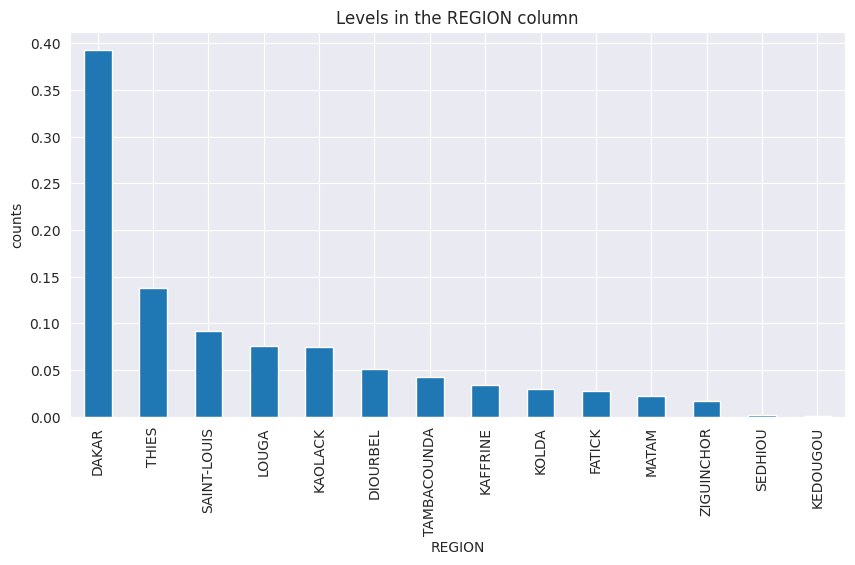

In [21]:
# Check the levels in the 'REGION' column

print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.title('Levels in the REGION column')
plt.ylabel('counts')
plt.xlabel('REGION')

From the plot above, most of the customers are located in Dakar, followed by Thies and Saint-Louis. Kedougou is the region with the least number of customers.

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

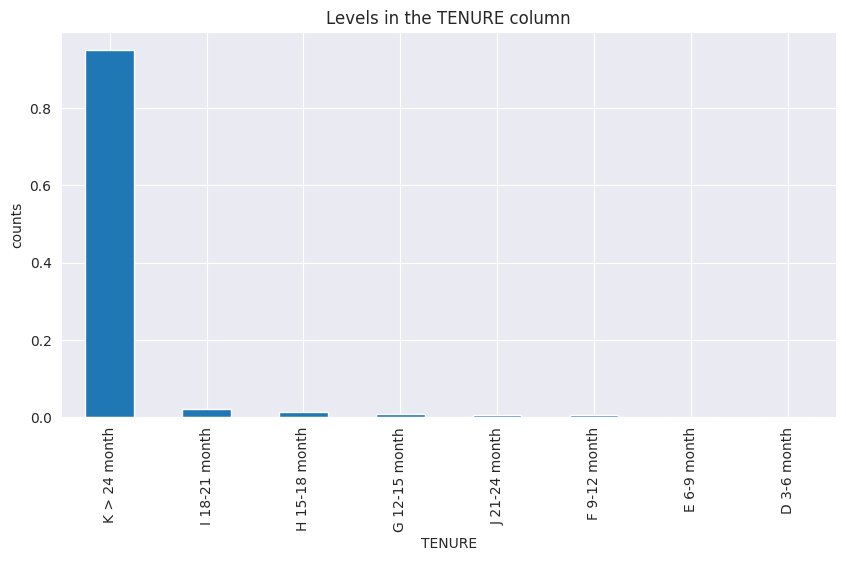

In [22]:
# Check the levels in the 'TENURE' column

print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.title('Levels in the TENURE column')
plt.ylabel('counts')
plt.xlabel('TENURE')

A huge percentage of the customers captured in the train dataset have stayed with the telecommunication company for over 24 months. This implies that the dataset is focused on old customers.

K > 24 month     180265
I 18-21 month      4017
H 15-18 month      2287
G 12-15 month      1369
J 21-24 month      1096
F 9-12 month        811
E 6-9 month         153
D 3-6 month          65
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

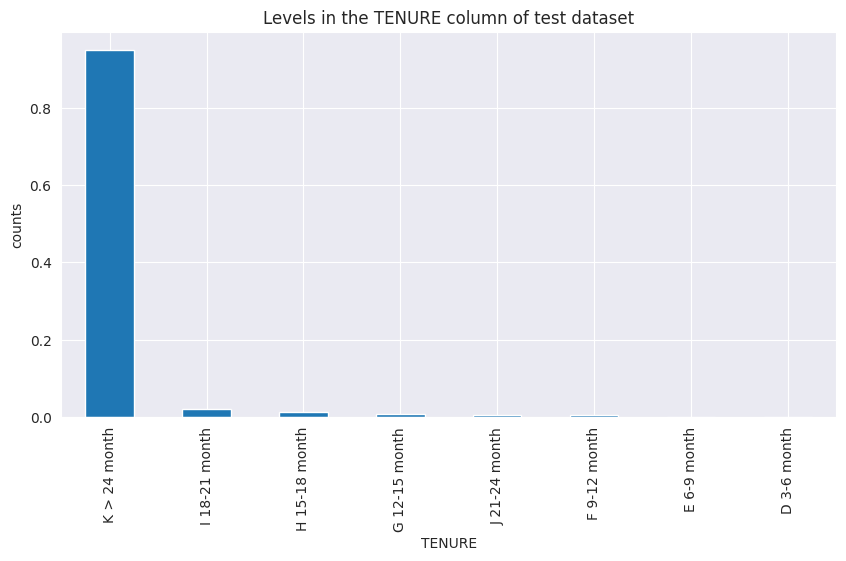

In [23]:
# Check the levels in the TENURE column of test dataset

print(test['TENURE'].value_counts())
plt.figure(figsize=(10,5))
test['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.title('Levels in the TENURE column of test dataset')
plt.ylabel('counts')
plt.xlabel('TENURE')

Both the train and test datasets focus on old customers, that is, customers that have been with the telecommunication network for over 24 months.

NO    1077024
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

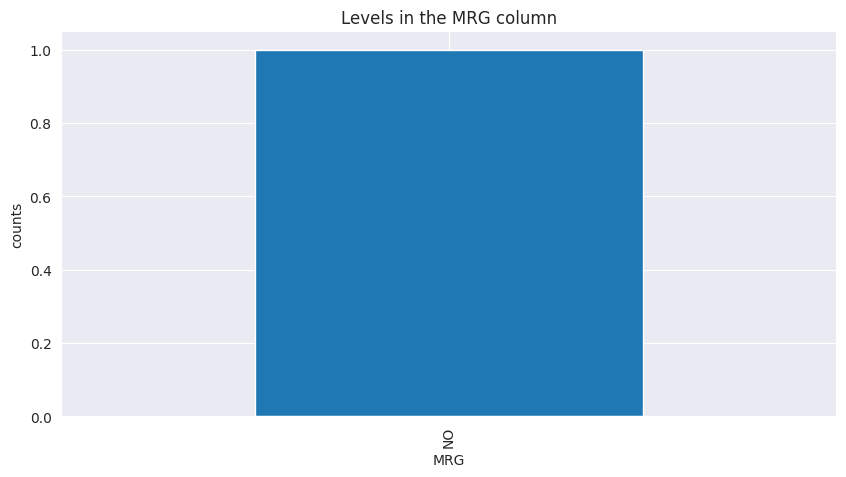

In [24]:
# Check the levels in the MRG column

print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.title('Levels in the MRG column')
plt.ylabel('counts')
plt.xlabel('MRG')

The MRG indicates if a client is going. The chart above shows that none of the customers in the train dataset is going.

NO    190063
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

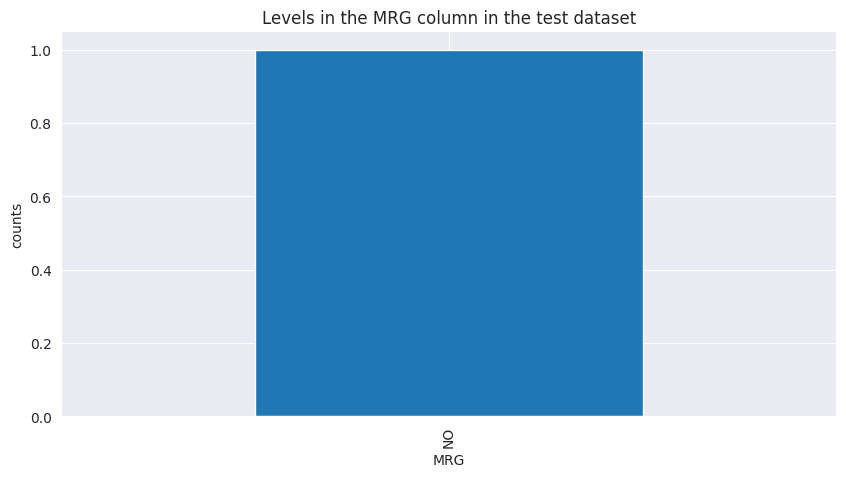

In [25]:
# Check the levels in the MRG column in the test dataset

print(test['MRG'].value_counts())
plt.figure(figsize=(10,5))
test['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.title('Levels in the MRG column in the test dataset')
plt.ylabel('counts')
plt.xlabel('MRG')

The MRG indicates if a client is going. The chart above shows that none of the customers in the test dataset is going.

All-net 500F=2000F;5d                          158779
On net 200F=Unlimited _call24H                  76302
Data:490F=1GB,7d                                57679
Data: 100 F=40MB,24H                            42515
Mixt 250F=Unlimited_call24H                     33620
MIXT:500F= 2500F on net _2500F off net;2d       32164
Data:1000F=2GB,30d                              29982
All-net 500F =2000F_AllNet_Unlimited            23476
Jokko_Daily                                     22548
Data: 200 F=100MB,24H                           21515
IVR Echat_Daily_50F                             14316
On-net 500=4000,10d                             13371
On-net 500F_FNF;3d                              11089
Data:200F=Unlimited,24H                         10986
MIXT: 200mnoff net _unl on net _5Go;30d          9612
On-net 1000F=10MilF;10d                          9302
Data:1000F=5GB,7d                                7470
VAS(IVR_Radio_Daily)                             7376
Twter_U2opia_Daily          

Text(0.5, 0, 'TOP_PACK')

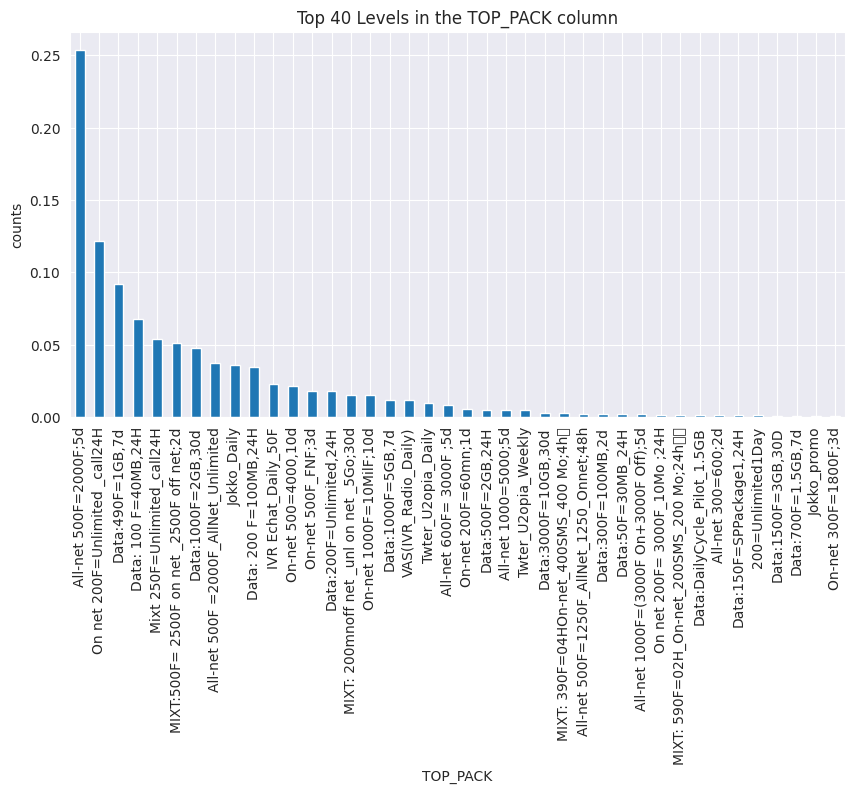

In [26]:
# Check the top 40 levels in the TOP_PACK column

print(train['TOP_PACK'].value_counts().head(40))
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).head(40).plot(kind='bar')
plt.title('Top 40 Levels in the TOP_PACK column')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    875031
1    201993
Name: CHURN, dtype: int64


Text(0.5, 0, 'CHURN')

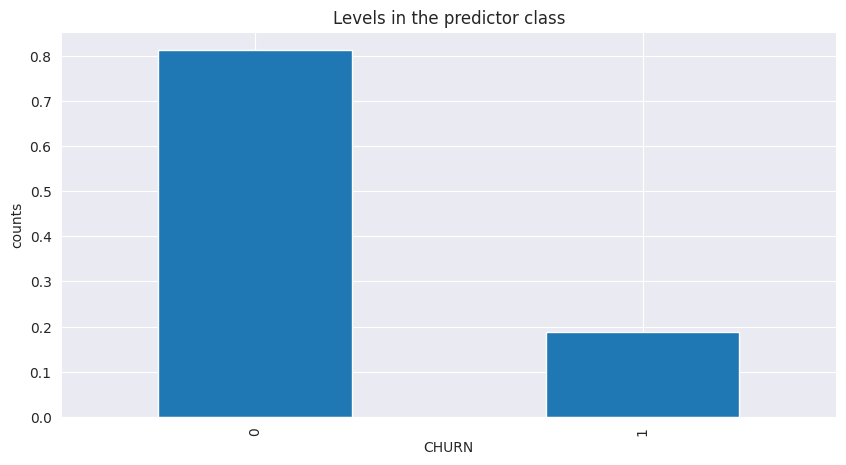

In [27]:
# Check if the predictor class is balanced

print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.title('Levels in the predictor class')
plt.ylabel('counts')
plt.xlabel('CHURN')

In [28]:
# Check the summary of numerical fields and apply transpose to easily display all the columns

summary_statistics = train.select_dtypes(include=['int64', 'float64']).describe().T
summary_statistics

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


<Axes: >

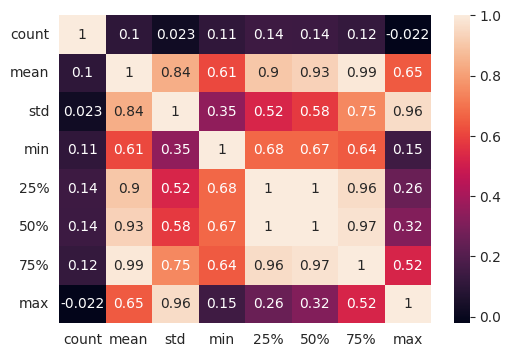

In [29]:
# Plot the correlation matrix using heatmap

sb.heatmap(summary_statistics.corr(), annot=True)

In [30]:
# Check for missing values in train dataset

train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

In [31]:
# Check for missing values in test dataset

test.isnull().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

# Hypothesis Testing

Null Hypothesis: There is no relationship between the tenure and the churn of customers.

Alternate Hypothesis: There is a relationship between the tenure and the churn of customers.

In [32]:
# Define the null hypothesis and alternative hypothesis
null_hypothesis = 'There is no relationship between the tenure and churn of customers.'
alternative_hypothesis = 'There is a relationship between the tenure and churn of customers.'

# Perform the chi-square test
observed = pd.crosstab(train['TENURE'], train['CHURN'])
chi2, p_value, _, _ = stats.chi2_contingency(observed)

# Set the significance level
alpha = 0.05

# Print the test results
print('Null Hypothesis:', null_hypothesis)
print('Alternative Hypothesis:', alternative_hypothesis)
print('Significance Level (alpha):', alpha)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

# Compare the p-value with the significance level
if p_value < alpha:

    print(f'Result: Reject the null hypothesis.', alternative_hypothesis)
else:
    print(f'Result: Fail to reject the null hypothesis.', null_hypothesis)

Null Hypothesis: There is no relationship between the tenure and churn of customers.
Alternative Hypothesis: There is a relationship between the tenure and churn of customers.
Significance Level (alpha): 0.05
Chi-square statistic: 2898.5207691813353
P-value: 0.0
Result: Reject the null hypothesis. There is a relationship between the tenure and churn of customers.


 The P-value of 0.0 suggests a strong evidence against the null hypothesis, indicating a statistically significant result. There is a strong relationship between customer tenure and customer churn.

# Answering Analytical Questions

## Questions

1. What is the overall churn rate of the telecommunication company?
2. What is the churn rate across the various regions?
3. What is the churn rate of custmers based on customer regularity?
4. What is the churn rate of customers based on their tenure?
(Group customers to short-term, mid-term and long term based on their tenure, then check the churn rate)
5. What is the churn rate of customers based on the top_up amounts?
(Group top_up amount to high, medium and low, then check the churn rate across the groups)
6. What is the churn rate of top pack users?
7. What is the churn rate based on the data volume?
8. What is the churn rate of custmers based on their income frequency?
9. What is the churn rate of customers based on their monthly income?
(Group monthly income to high-income earners, medium income earners, and low income earners, then check the churn rate across them)
10. What is the relationship between the monthly income of customers and the frequency of their recharge (the number of times a customer activated the top pack packages)?
11. What is the relationship between the number of times a customer made an income and the number of times a customer activated the top pack?
12. What is the churn distribution of customers based on calls to Zone1 and Zone 2?
13. What is the churn distribution of customers based international calls, calls to Orange, and calls to Tigo?

Question 1: What is the overall churn rate of the telecommunication company?

Total Customers: 1077024
Churned Customers: 201993
Churn Rate: 18.8%


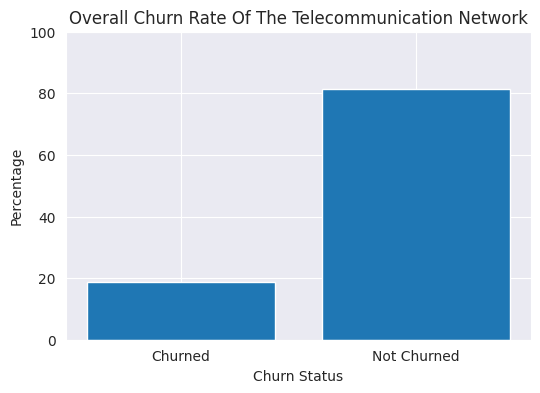

In [33]:
# Calculate the churn rate
total_customers = len(train)
churned_customers = train['CHURN'].sum()
churn_rate = (churned_customers / total_customers) * 100

# Display the churn rate
print('Total Customers:', total_customers)
print('Churned Customers:', churned_customers)
print(f'Churn Rate: {churn_rate.round(1)}%')

# Plot the churn rate
# plt.figure(figsize=(6, 4))
plt.bar(['Churned', 'Not Churned'], [churn_rate, 100-churn_rate])
plt.title('Overall Churn Rate Of The Telecommunication Network')
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.ylim([0, 100])

# Save the plot into the drive through the image_path
file_name = 'Overall Churn Rate Of The Telecommunication Network.png' # Specify the file name and extension
file_path = os.path.join(image_path, file_name) # Combine the file name with the image_path
plt.savefig(file_path)

# Display the chart
plt.show()

201,993 customers have churned out of 1,077,024 customers in the train dataset. This represents an 18.8% churn rate.

Question 2: What is the churn rate across the various regions?

In [34]:
# Identify the regions

regions = train['REGION'].unique()
regions

array(['DAKAR', nan, 'SAINT-LOUIS', 'THIES', 'LOUGA', 'MATAM', 'FATICK',
       'KAOLACK', 'DIOURBEL', 'TAMBACOUNDA', 'ZIGUINCHOR', 'KOLDA',
       'KAFFRINE', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

Notice that the 'REGION' column above has missing values. The percentage of these rows with missing values will be evaluated.

In [35]:
# Calculate the total number of rows with missing values in the 'REGION' column
missing_rows = train['REGION'].isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(train)

# Calculate the percentage of rows with missing values in the 'REGION' column
percentage_missing = (missing_rows / total_rows) * 100

print(f"The percentage of rows with missing values in 'REGION' column is: {percentage_missing:.1f}%")

The percentage of rows with missing values in 'REGION' column is: 39.4%


39.4 % of the rows in the 'REGION" column have missing values. These rows will be dropped in order to properly analyze the rest of the rows. A new copy of the train dataset will be created for this purpose.

In [36]:
# Create a copy of the train dataset
train_df = train.copy()

# Drop rows with missing values in the 'REGION' column
train_df = train_df.dropna(subset=['REGION'])

# Identify the regions and the customers per region
regions = train_df['REGION'].unique()
customers_per_region = train_df['REGION'].value_counts()
percentage_of_customers_per_region = ((customers_per_region / customers_per_region.sum()) * 100).round(1)

# Initialize lists to store data for all regions
churned_customers_per_region = []
churn_rate_per_region = []

# Function to calculate the churn rate of different regions
for region in regions:
    region_df = train_df[train_df['REGION'] == region]
    churned_customers = region_df['CHURN'].sum()
    total_customers = len(region_df)

    if total_customers > 0:
        churn_rate = (churned_customers / total_customers) * 100
    else:
        churn_rate = 0.0

    churn_rate = churn_rate.round(1)

    churned_customers_per_region.append(churned_customers)
    churn_rate_per_region.append(churn_rate)

# Create a dictionary to store the region and churn data
churn_rate_by_region = {
    'REGION': regions,
    'CUSTOMERS PER REGION': customers_per_region,
    'PERCENTAGE OF CUSTOMERS': percentage_of_customers_per_region,
    'CHURNED CUSTOMERS PER REGION': churned_customers_per_region,
    'CHURN RATE (%)': churn_rate_per_region
}

# Display the region and churn data as a DataFrame
churn_rate_by_region_df = pd.DataFrame(churn_rate_by_region).reset_index(drop=True)
churn_rate_by_region_df

,REGION,CUSTOMERS PER REGION,PERCENTAGE OF CUSTOMERS,CHURNED CUSTOMERS PER REGION,CHURN RATE (%)
0,DAKAR,256259,39.3,4931,1.9
1,SAINT-LOUIS,90171,13.8,728,1.2
2,THIES,59895,9.2,1499,1.7
3,LOUGA,49679,7.6,799,1.6
4,MATAM,48498,7.4,302,2.1
5,FATICK,33564,5.1,243,1.4
6,KAOLACK,27562,4.2,1204,2.5
7,DIOURBEL,22067,3.4,919,2.7
8,TAMBACOUNDA,19464,3.0,437,1.6
9,ZIGUINCHOR,17775,2.7,303,2.7


The DataFrame above shows the number of customers in each region, the percentage of customers in each region, the number of customers that churned, and the churn rate of each region. The highest churn rate is observed in Sedhiou Region with a churn rate of 5.41% and Kedougou region with a churn rate of 4.09%. Also observe that these regions have the lowest number (and percentage) of customers. This suggests that the telecommunication network should intensify customer retention policies in these regions. The region with a very low churn rate is Kaffrine region with a churn rate of 0.7%. Dakar region has the highest number (and percentage) of customers with a moderate churn rate.

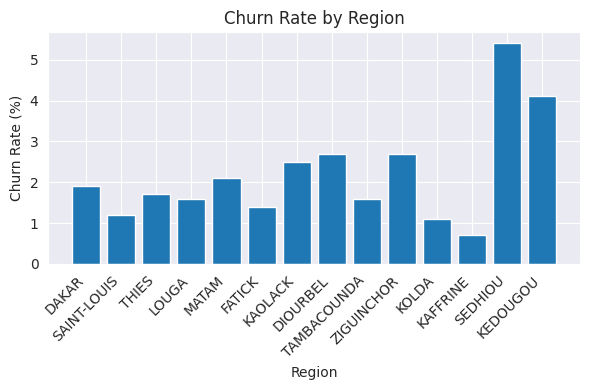

In [37]:
# Plot the churn rate per region
# plt.figure(figsize=(6, 4))
plt.bar(churn_rate_by_region_df.index, churn_rate_by_region_df['CHURN RATE (%)'], tick_label=churn_rate_by_region_df['REGION'])
plt.title('Churn Rate by Region')
plt.xlabel('Region')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot into the drive through the image_path
file_name = 'Churn Rate by Region.png'
file_path = os.path.join(image_path, file_name)
plt.savefig(file_path)

# Show the chart
plt.show()

As shown above, Sedhiou region has the highest churn rate followed by Kedougou region, while Kaffrine region has the lowest churn rate.

Question 3: What is the churn rate of customers based on customer regularity?

Regularity refers to the number of times a customer is active for 90 days. The most active and least active customers will be determined first, and checked for churn.

In [38]:
# Find the highest and lowest values in the "REGULARITY" column
highest_regularity = train['REGULARITY'].max()
lowest_regularity = train['REGULARITY'].min()

# Find the user ID of the most active customer and least active customer
most_active = train[train['REGULARITY'] == highest_regularity]['user_id'].values[0]
least_active = train[train['REGULARITY'] == lowest_regularity]['user_id'].values[0]

# Check if the most active customer and least active customer churned
churned_most_active = train[train['user_id'] == most_active]['CHURN'].values[0]
churned_least_active = train[train['user_id'] == least_active]['CHURN'].values[0]

# Print the results
print(f"Customer {most_active} had the highest regularity of {highest_regularity} and {'churned' if churned_most_active == 1 else 'did not churn'}.")
print(f"Customer {least_active} had the lowest regularity of {lowest_regularity} and {'churned' if churned_least_active == 1 else 'did not churn'}.")

Customer 7ee9e11e342e27c70455960acc80d3f91c1286d1 had the highest regularity of 62 and did not churn.
Customer da90b5c1a9b204c186079f89969aa01cb03c91b2 had the lowest regularity of 1 and did not churn.


As shown above. the most active and least active customers did not churn.

Next, the usage activity of the customers will be used to group them into Low-Usage Customers, Medium-Usage Customers, and High-Usage Customers. These groups of customers will then be checked for churn.

In [39]:
# Define the usage groups and corresponding labels
bins = [0, 20, 40, float('inf')]
labels = ['Low-Usage Customers', 'Medium-Usage Customers', 'High-Usage Customers']

# Create a new column 'usage_group' to store the usage group labels
train['usage_group'] = pd.cut(train['REGULARITY'], bins=bins, labels=labels)

# Calculate the churn rate, the number of customers and the percentage of customers in each group
churn_rate_by_group = train.groupby('usage_group')['CHURN'].mean()
customers_per_group = train['usage_group'].value_counts()
percentage_customers_per_group = round((customers_per_group / customers_per_group.sum()) * 100,1)

# Remove the 'usage_group' column
train.drop('usage_group', axis=1, inplace=True)

# Create a DataFrame to display the results
usage_group_data = pd.DataFrame({'Number of Customers': customers_per_group, 'Percentage of Customers in Group(%)': percentage_customers_per_group, 'Churn Rate (%)': churn_rate_by_group})

# Display the DataFrame
usage_group_data


,Number of Customers,Percentage of Customers in Group(%),Churn Rate (%)
Low-Usage Customers,499031,46.3,0.379327
Medium-Usage Customers,202174,18.8,0.046064
High-Usage Customers,375819,34.9,0.009004


As shown in the DataFrame above, there are more Low-Usage Customers (499,031), and this group of customers have the highest churn rate (0.379327). While High-Usage Customers (375,819) have the lowest churn rate (0.009004). This suggests that customer retention policies should be targeted at the Low-Usage Customers.

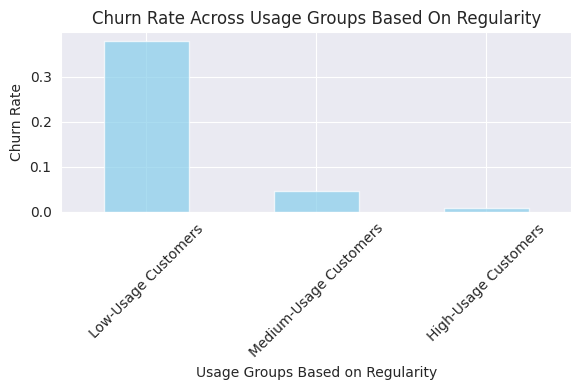

In [40]:
# Plot the churn rate across the usage groups
# plt.figure(figsize=(6, 4))
churn_rate_by_group.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Churn Rate Across Usage Groups Based On Regularity')
plt.xlabel('Usage Groups Based on Regularity')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot into the drive through the image_path
file_name = 'Churn Rate Across Usage Groups Based On Regularity.png'
file_path = os.path.join(image_path, file_name)
plt.savefig(file_path)

# Show the chart
plt.show()

The chart above illustrates that Low-Usage Customers have the highest churn rate while High-Usage Customers have the lowest churn rate.

Question 4: What is the churn rate of customers based on their tenure?
A customer's tenure refers to the customer's duration in the network. The unique tenures are identified below.

In [41]:
# Identify the unique tenures in the 'TENURE' group

train['TENURE'].unique()

array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)

The tenures are grouped into categories. The churn rate across these tenure groups will be examined.

In [42]:
# Calculate the number of customers, the percentage of customers, and the churn rate for each tenure
customers_per_tenure = train['TENURE'].value_counts()
percentage_customers_per_tenure = ((customers_per_tenure / customers_per_tenure.sum()) * 100).round(2)
churn_rate_by_tenure = (train.groupby('TENURE')['CHURN'].mean()).round(2) # 2 decimal places where used in both to properly display the results

# Create a DataFrame to display the results
tenure_group_data = pd.DataFrame({
    'Number of Customers': customers_per_tenure,
    'Percentage of Customers (%)': percentage_customers_per_tenure,
    'Churn Rate (%)': churn_rate_by_tenure
})

# Display the DataFrame
tenure_group_data

,Number of Customers,Percentage of Customers (%),Churn Rate (%)
D 3-6 month,387,0.04,0.14
E 6-9 month,929,0.09,0.17
F 9-12 month,4604,0.43,0.25
G 12-15 month,7520,0.70,0.32
H 15-18 month,12913,1.20,0.27
I 18-21 month,22494,2.09,0.28
J 21-24 month,6324,0.59,0.22
K > 24 month,1021853,94.88,0.18


As shown above, 94.88% of the customers have been with the network for 24 months and above (that is, 2 years and above). The churn rate among this group of customers is 0.18%, which is relatively low. The highest churn rate is 0.32% and it is observed for customers within 12-15 months duration. After one year with the network, these customers churned (became inactive for 90 days). Promotional activities such as one-year bonanza may help to retain these set of customers on the network.

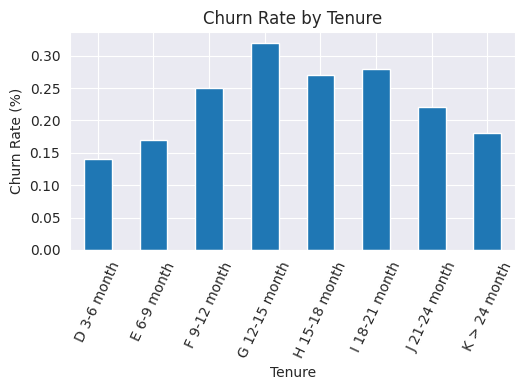

In [43]:
# Plot a bar chart for the churn rate by tenure
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
tenure_group_data['Churn Rate (%)'].plot(kind='bar')
plt.title("Churn Rate by Tenure")
plt.xlabel("Tenure")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=65)
plt.tight_layout()

# Save the plot into the drive through the image_path
file_name = 'Churn Rate by Tenure.png'
file_path = os.path.join(image_path, file_name)
plt.savefig(file_path)

# Display the chart
plt.show()

# Feature Engineering


Feature engineering is the process of creating new, meaningful, and informative features (variables) from the existing data to improve the performance of machine learning models. It involves creating, selecting, or transforming features that help models better understand patterns, relationships, and trends within the data.

Effective feature engineering can lead to more accurate and efficient models because the process would provide relevant data with reduced noise, which would enhance the predictive power of the data.

Feature engineering requires domain knowledge and creativity to extract valuable insights and knowledge from the raw data, which can significantly impact the success of machine learning projects.

The feature engineering techniques that will be used in this project are: feature selection, data sampling, feature extraction, data splitting, feature scaling and feature encoding. These techniques will enhance the modelling process.

Since changes will be made on the train and test datasets during the feature engineering processes, copies of these datasets will first be made for future usage.

In [44]:
# Make copies of the train and test datasets before commencing the features engineering processes

train_data = train.copy()
test_data = test.copy()

## Feature Selection

This is a feature engineering process that is used to choose the desired columns (columns that are relevant to the modelling) for further processing. This means that some of the columns of the train dataset will be dropped at this point, leaving only the relevant columns.

In [45]:
# List the columns in the train dataset

train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [46]:
# Identify the columns to drop
columns_to_drop = ['user_id', 'REGION', 'ZONE1', 'ZONE2', 'MRG', 'TOP_PACK']

# Drop these columns in the train dataset using the "drop()" method
train.drop(columns=columns_to_drop, axis=1, inplace=True)
train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,62,30.0,0
1,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
2,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
3,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,61,7.0,0
4,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,56,11.0,0


In [47]:
# Drop these columns in the test datast using the "drop()" method

test.drop(columns=columns_to_drop, axis=1, inplace=True)
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,35,5.0
1,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,22,NaN
3,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
4,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,60,4.0


## Data Sampling

Large datasets can be computationally expensive and time-consuming to work with. Data sampling is a technique used to create a smaller, representative subset of the data for model development and testing. This can make the modeling process more efficient.

In [48]:
# Check the shape of the train dataset

train.shape

(1077024, 13)

Since the train dataset is very large (with 1,077,024 rows), a subset of the data would be used to train the models in order to adequately manage time and available computational resources.

There are many rows with missing values across the columns of the train dataset. This is as shown below.

In [49]:
# identify the columns with missing values on the train dataset

train.isnull().sum()

TENURE                 0
MONTANT           377885
FREQUENCE_RECH    377885
REVENUE           362355
ARPU_SEGMENT      362355
FREQUENCE         362355
DATA_VOLUME       529763
ON_NET            393174
ORANGE            447144
TIGO              644774
REGULARITY             0
FREQ_TOP_PACK     450895
CHURN                  0
dtype: int64

In [50]:
# Calculate the percentage of missing values for each column on the train dataset
train_missing_percentage = (train.isnull().mean() * 100).round(2)

# Create a DataFrame to display the results
train_missing_percentage_df = pd.DataFrame({'Missing Percentage (%)': train_missing_percentage})

# Display the DataFrame
train_missing_percentage_df

,Missing Percentage (%)
TENURE,0.00
MONTANT,35.09
FREQUENCE_RECH,35.09
REVENUE,33.64
ARPU_SEGMENT,33.64
FREQUENCE,33.64
DATA_VOLUME,49.19
ON_NET,36.51
ORANGE,41.52
TIGO,59.87


A great percentage of rows across the columns of the train dataset have missing values, filling them by imputation would introduce some bias to the dataset. Dropping these rows would be a better decision. This will also help to generate a subset of the train dataset which would optimize the modelling process.

'DATA_VOLUME', 'TIGO', 'ORANGE', and 'FREQ_TOP_PACK' are the columns with the highest percentage of missing values in the train dataset. The rows with missing values across these columns will be dropped to achieve manual data sampling.

In [51]:
# Create a variable for the columns with high missing values

columns_with_high_missing_values = ['DATA_VOLUME', 'TIGO', 'ORANGE', 'FREQ_TOP_PACK']

In [52]:
# Drop the rows with missing values across these columns in train dataset
train = train.dropna(subset=columns_with_high_missing_values)

# Verify that there are very little missing values
train.isnull().sum()

TENURE                0
MONTANT             472
FREQUENCE_RECH      472
REVENUE               1
ARPU_SEGMENT          1
FREQUENCE             1
DATA_VOLUME           0
ON_NET            11233
ORANGE                0
TIGO                  0
REGULARITY            0
FREQ_TOP_PACK         0
CHURN                 0
dtype: int64

As can be seen above, there are now fewer rows with missing values across the columns of the train dataset.

In [53]:
# Recheck the percentage of missing values for each column on the train dataset

train_missing_percentage = (train.isnull().mean() * 100).round(2)
train_missing_percentage_df = pd.DataFrame({'Missing Percentage (%)': train_missing_percentage})
train_missing_percentage_df

,Missing Percentage (%)
TENURE,0.00
MONTANT,0.17
FREQUENCE_RECH,0.17
REVENUE,0.00
ARPU_SEGMENT,0.00
FREQUENCE,0.00
DATA_VOLUME,0.00
ON_NET,4.11
ORANGE,0.00
TIGO,0.00


The percentage of missing values across the columns of the train dataset has greatly reduced.

In [54]:
# Check the shape of the train dataset

train.shape

(273390, 13)

A reasonable subset of the train datset has been obtained which will help in managing available time, as well as computational resources for the modelling process.

The manual data sampling technique (dropping of some rows with missing values) achieved the following results:
- The percentage of rows with missing values reduced across the columns. This would ensure that filling the remaining few missing values by imputation will not introduce significant bias to the dataset.
- The number of rows in the train dataset reduced, giving a reasonable subset that is still suitable for the modelling process. This would ensure that available time and computational resources are well-managed.

**Next steps for handling missing values:**
- The remaining missing values in the train dataset will be handled by imputation.
- All the missing values in the test dataset will also be handled by imputation. Rows with missing values in the test dataset will not be dropped in order to maintain the number of rows in the dataset, as each row represents a seperate user whose churn prediction is expected.

**Note:** The imputation described above will be done after the feature extraction and data splitting processes to generate the training set and validation set. This means that the training and validation sets will be imputed seperately. Imputing them seperately will avoid the possiblility of data leakage, which can reduce the effectiveness of the validation set. The validation set is an important component for model evaluation.



## Feature Extraction

Feature extraction transforms data into a reduced set of relevant and informative features, which can be more meaningful and suitable for use in Data Analysis and Machine Learning tasks, making it easier for Machine Learning algorithms to learn and make accurate predictions or classifications.

The feature extraction technique used in this project aims to obtain the features (X) and target (y) variables of the train dataset, before splitting the dataset to obtain the training set and validation set.

In [55]:
# Obtain the features (X) and target (y) variables on the train dataset
y = train['CHURN']
X = train.drop(columns=['CHURN'], axis=1)

# Print the shape of the features
print(X.shape)
print(y.shape)
print(test.shape)

(273390, 12)
(273390,)
(190063, 12)


## Data Splitting

In [56]:
# Split the features(X) and target(y) variables to obtain the training and validation sets
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.5,random_state=42)

# Print the shape of the training and validation sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(136695, 12)
(136695,)
(136695, 12)
(136695,)


## Imputation

Imputation is the process of filling in missing values in a dataset with estimated or calculated values. It is typically done to ensure that the dataset is complete and can be used for various data analysis and machine learning tasks. Common imputation strategies include filling missing values with the mean, median, mode, or other statistical measures.

Since the columns with missing values are numeric columns and the percentage of missing values are now relatively small, a SimpleImputer with strategy set to 'mean' will be used to fill the missing values. The training set, validation set, and test dataset will be fitted to the imputer and transformed seperately to avoid data leakage.

In [57]:
# Initialize the imputer

imputer = SimpleImputer(strategy='mean')

In [58]:
# Specify all the numeric columns

num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
            'REGULARITY', 'FREQ_TOP_PACK']

In [59]:
# Fit and transform the numerical columns of the training set
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])

# Verify that the training set has been transformed by the imputer
X_train.isnull().sum()

TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [60]:
# Fit and transform the numerical columns of the validation set
X_val[num_cols] = imputer.fit_transform(X_val[num_cols])

# Verify that the validation set has been transformed by the imputer
X_val.isnull().sum()

TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [61]:
# Fit and transform the numerical columns of the test dataset
test[num_cols] = imputer.fit_transform(test[num_cols])

# Verify that the test dataset has been transformed by the imputer
test.isnull().sum()

TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

## Feature Scaling

Scaling is the process of transforming numerical features in a dataset to have a common scale or range. It is important when the numerical features have different units or magnitudes, as some machine learning algorithms are sensitive to feature scales. StandardScaler (z-score normalization) and Min-MaxScaler are common methods to scale features to a similar range.

For this project, StandardScaler will be used because of it's robustness and compatibility with a wide range of Machine Learning models. The training set, validation set, and test dataset will be fitted to the scaler and transformed seperately to avoid data leakage.

In [62]:
# Initialize the scaler

scaler = StandardScaler()

In [63]:
# Fit and transform the numerical columns of training set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Verify that the numerical columns of training set have been transformed by the scaler
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
663934,K > 24 month,0.398747,0.772313,0.315404,0.315283,0.557940,-0.360083,-3.771905e-01,-0.223419,0.933487,0.546882,0.409033
196700,K > 24 month,-0.869937,-0.722119,-0.875113,-0.875235,-0.707342,-0.345027,-2.487454e-01,-0.519019,-0.289791,0.546882,-0.795618
508564,K > 24 month,-0.377244,-0.397243,-0.394023,-0.394023,-0.526588,0.516897,-5.290768e-17,-0.471084,-0.347357,0.483201,-0.157862
958565,K > 24 month,0.090814,0.057585,0.140012,0.140132,-0.165079,-0.397882,-1.342617e-01,0.847132,0.199520,0.483201,0.338171
158051,K > 24 month,0.300208,0.512412,0.332327,0.332327,0.256682,-0.475511,-1.984843e-01,2.496899,-0.203442,0.737925,0.267309


In [64]:
# Fit and transform the numerical columns of validation set
X_val[num_cols] = scaler.fit_transform(X_val[num_cols])

# Verify that the numerical columns of validation set have been transformed by the scaler
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
545753,K > 24 month,2.692292,2.162703,2.645668,2.645547,1.661129,-0.469575,1.276926e+00,2.379359,3.325874,0.929980,2.761380
509776,K > 24 month,1.440821,2.359473,1.466323,1.466445,2.086396,0.841284,2.919268e-01,-0.381656,-0.265161,0.866172,2.907196
919237,K > 24 month,-0.657417,-0.723254,-0.613358,-0.613482,-0.708215,0.195787,-5.302153e-17,-0.421963,-0.323790,-0.218557,-0.738202
701719,K > 24 month,-0.427047,-0.526484,-0.385066,-0.385067,-0.525958,-0.431219,-2.584042e-01,-0.018895,-0.353105,-0.090942,-0.373662
535236,K > 24 month,0.332553,0.129415,0.326696,0.326573,0.567585,2.408059,-3.889913e-01,0.049627,-0.338447,0.929980,-0.227846


In [65]:
# Fit and transform the numerical columns of test data
test[num_cols] = scaler.fit_transform(test[num_cols])

# Verify that the numerical columns of test data have been transformed by the scaler
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,I 18-21 month,-0.527651,-6.097363e-01,-5.134981e-01,-5.136739e-01,-7.495701e-01,-0.391548,-3.073782e-01,-0.158668,8.625124e-17,0.309422,-4.561602e-01
1,K > 24 month,0.000000,3.340898e-16,1.563923e-16,-1.172944e-16,-1.489433e-16,0.000000,8.044003e-17,0.000000,8.625124e-17,-1.171084,1.913653e-16
2,K > 24 month,0.000000,3.340898e-16,1.563923e-16,-1.172944e-16,-1.489433e-16,-0.391548,8.044003e-17,0.000000,8.625124e-17,-0.273808,1.913653e-16
3,K > 24 month,0.000000,3.340898e-16,1.563923e-16,-1.172944e-16,-1.489433e-16,0.000000,8.044003e-17,0.000000,8.625124e-17,-0.991629,1.913653e-16
4,K > 24 month,-0.071349,-4.216605e-01,2.592508e-02,2.592213e-02,8.890613e-02,0.515848,-3.554922e-01,-0.455223,-5.572253e-01,1.431017,-5.638893e-01


## Feature Encoding

Encoding is the process of converting categorical (non-numeric) variables into a numerical format, which is suitable for machine learning algorithms. Categorical variables cannot be used directly by most Machine Learning models, so they need to be encoded into numerical representations.
OneHotEncoder, LabelEncoder, and BinaryEncoder are commonly used for encoding categorical variables.

Since the dataset for this project is considerably large, LabelEncoder will be used for its simplicity and memory-efficiency. The training set, validation set, and test dataset will be fitted to the encoder and transformed seperately to avoid data leakage.

Note that the only categorical column on the datasets is the 'TENURE' column.

In [66]:
# Initialize the encoder

encoder = LabelEncoder()

In [67]:
# Fit and transform the 'TENURE' column of training set
X_train['TENURE'] = encoder.fit_transform(X_train['TENURE'])

# Verify that the 'TENURE' column of training set has been transformed by the encoder
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
663934,7,0.398747,0.772313,0.315404,0.315283,0.557940,-0.360083,-3.771905e-01,-0.223419,0.933487,0.546882,0.409033
196700,7,-0.869937,-0.722119,-0.875113,-0.875235,-0.707342,-0.345027,-2.487454e-01,-0.519019,-0.289791,0.546882,-0.795618
508564,7,-0.377244,-0.397243,-0.394023,-0.394023,-0.526588,0.516897,-5.290768e-17,-0.471084,-0.347357,0.483201,-0.157862
958565,7,0.090814,0.057585,0.140012,0.140132,-0.165079,-0.397882,-1.342617e-01,0.847132,0.199520,0.483201,0.338171
158051,7,0.300208,0.512412,0.332327,0.332327,0.256682,-0.475511,-1.984843e-01,2.496899,-0.203442,0.737925,0.267309


In [68]:
# Fit and transform the 'TENURE' column of validation set
X_val['TENURE'] = encoder.fit_transform(X_val['TENURE'])

# Verify that the 'TENURE' column of validation set has been transformed by the encoder
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
545753,7,2.692292,2.162703,2.645668,2.645547,1.661129,-0.469575,1.276926e+00,2.379359,3.325874,0.929980,2.761380
509776,7,1.440821,2.359473,1.466323,1.466445,2.086396,0.841284,2.919268e-01,-0.381656,-0.265161,0.866172,2.907196
919237,7,-0.657417,-0.723254,-0.613358,-0.613482,-0.708215,0.195787,-5.302153e-17,-0.421963,-0.323790,-0.218557,-0.738202
701719,7,-0.427047,-0.526484,-0.385066,-0.385067,-0.525958,-0.431219,-2.584042e-01,-0.018895,-0.353105,-0.090942,-0.373662
535236,7,0.332553,0.129415,0.326696,0.326573,0.567585,2.408059,-3.889913e-01,0.049627,-0.338447,0.929980,-0.227846


In [69]:
# Fit and transform the 'TENURE' column of test data
test['TENURE'] = encoder.fit_transform(test['TENURE'])

# Verify that the 'TENURE' column of test data has been transformed by the encoder
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK
0,5,-0.527651,-6.097363e-01,-5.134981e-01,-5.136739e-01,-7.495701e-01,-0.391548,-3.073782e-01,-0.158668,8.625124e-17,0.309422,-4.561602e-01
1,7,0.000000,3.340898e-16,1.563923e-16,-1.172944e-16,-1.489433e-16,0.000000,8.044003e-17,0.000000,8.625124e-17,-1.171084,1.913653e-16
2,7,0.000000,3.340898e-16,1.563923e-16,-1.172944e-16,-1.489433e-16,-0.391548,8.044003e-17,0.000000,8.625124e-17,-0.273808,1.913653e-16
3,7,0.000000,3.340898e-16,1.563923e-16,-1.172944e-16,-1.489433e-16,0.000000,8.044003e-17,0.000000,8.625124e-17,-0.991629,1.913653e-16
4,7,-0.071349,-4.216605e-01,2.592508e-02,2.592213e-02,8.890613e-02,0.515848,-3.554922e-01,-0.455223,-5.572253e-01,1.431017,-5.638893e-01


## Class Balancing

Class balancing aims to address the issue of class imbalance, where one class has significantly fewer samples compared to the other class. Techniques for class balancing include oversampling the minority class, undersampling the majority class, or a combination of both to create a balanced training set. Balancing the classes is essential to avoid model bias and ensure that the Machine Learning models can effectively learn from the available data.

For this project, there is an imbalance in the predictor class (target variable) of the training set. This imbalance will be handled by oversampling the minority class and undersampling the majority class as shown below. The Synthetic Minority Over-sampling Technique (SMOTE) and the RandomUnderSampler will be used respectively to achieve this. These techniques are preferred as this project involves binary classification.

In [70]:
# Perform oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Perform undersampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_oversampled, y_train_oversampled)

# Print the class distribution before and after balancing
print("Before balancing:")
print(y_train.value_counts())
print("\nAfter balancing:")
print(pd.Series(y_train_balanced).value_counts())

Before balancing:
0    133243
1      3452
Name: CHURN, dtype: int64

After balancing:
0    133243
1    133243
Name: CHURN, dtype: int64


# Modelling and Evaluation

Modelling refers to the process of selecting and training a mathematical or computational representation of a real-world phenomenon. This representation is designed to capture the essential relationships, patterns, and behaviors observed in data. The primary goal of modeling is to make predictions, gain insights, or simulate the behavior of the real-world system, which may be too complex or difficult to analyze directly. There are different models for Machine Learning processes. The choice of modeling technique and the specific steps involved can vary greatly depending on the problem domain and the available data. The ultimate goal of modeling is to generate data-driven insights and use them to solve problems or make informed decisions.

The models to be used for this project are:
- Logistic Regression
- Random Forest
- Gradient Boosting
- Adaptive Boosting
- Support Vector Machine
- Gaussian Naive Bayes

These models will be trained on the imbalanced training set, and the balanced training set to determine which set is giving better results. The results of each training process is measured by evaluating the performance of the models on the respective validation sets with the use of performance metrics.

Performance metrics are the measures or criteria used to evaluate the performance/effectiveness of a machine learning model. The performance of the models above will be evaluated with the following performance metrics:
- Accuracy: Accuracy measures the overall correctness of a model's predictions by calculating the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances in the dataset. It is useful when all classes have similar importance and the class distribution is balanced. It can be misleading in imbalanced datasets.
- Precision: Precision assesses the ability of a model to correctly identify positive instances among all instances it predicts as positive. It is the ratio of true positives to the total number of instances predicted as positive. Precision is important when the cost of false positives (Type I errors) is high, and you want to minimize the rate of false alarms.
- Recall (Sensitivity or True Positive Rate): Recall evaluates the model's ability to capture all positive instances in the dataset. It is the ratio of true positives to the total number of actual positive instances. Recall is crucial when the cost of false negatives (Type II errors) is high, and you want to minimize the rate of missed positive cases.
- F1 Score: The F1 score is a balanced metric that combines Precision and Recall into a single value. It is the harmonic mean of Precision and Recall. A higher F1 score indicates a better balance between Precision and Recall. F1 score is useful when you want a single metric that considers both false positives and false negatives. It's particularly relevant when class distribution is imbalanced.
- Area Under the Curve (AUC): AUC measures the ability of a model to discriminate between positive and negative instances across different probability thresholds. It is often used in the context of receiver operating characteristic (ROC) curves. A higher AUC indicates a better ability to rank positive instances higher than negative instances. AUC is valuable for evaluating the overall quality of a binary classifier. It's especially useful when the dataset may have class imbalance or when you need to compare the performance of different models.

**The primary evaluation metric is Area Under the Curve (AUC).**

The models will be tuned to optimize their performance, then trained and evaluated again to observe if the performance metrics improved. The results of the performance metrics for each training process will be stored in a DataFrame for easy comparison.

In [71]:
# Create a list of models to train and evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42, solver='lbfgs')),
    ('Random Forest', RandomForestClassifier(bootstrap=True, criterion="gini", n_jobs=-1)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42, n_estimators=50, subsample=1.0)),
    ('Adaptive Boosting', AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1.0)),
    ('Support Vector Machine', SVC(random_state=42, C=1.0)),
    ('Gaussian Naive Bayes', GaussianNB())
]

## Model training and evaluation with imbalanced dataset

In [72]:
# Initialize a dictionary to store the performance metrics of the models after training with imbalanced dataset
imbal_performance_metrics = {}

# Model training, evaluation and result calculation
for model_name, model in models:
    # Model training with imbalanced dataset
    model.fit(X_train, y_train)

    # Using the models to make predictions on the validation set
    y_pred_imbal = model.predict(X_val)

    # Calculate the performance metrics of the models on the imbalanced dataset
    accuracy = accuracy_score(y_val, y_pred_imbal)
    precision = precision_score(y_val, y_pred_imbal)
    recall = recall_score(y_val, y_pred_imbal)
    f1 = f1_score(y_val, y_pred_imbal)
    auc = roc_auc_score(y_val, y_pred_imbal)

    # Store the performance metrics results
    imbal_performance_metrics[model_name] = {
        'Imbal Accuracy': accuracy,
        'Imbal Precision': precision,
        'Imbal Recall': recall,
        'Imbal F1 Score': f1,
        'Imbal AUC': auc
    }

In [73]:
# Create a DataFrame to store the performance metrics of the models on the imbalanced dataset
imbalanced_performance_metrics = pd.DataFrame(imbal_performance_metrics).transpose()

# Arrange the performance metrics DataFrame in descending order based on the AUC score
imbalanced_performance_metrics = imbalanced_performance_metrics.sort_values('Imbal AUC', ascending=False)

# Show the performance metrics DataFrame of the models on the imbalanced dataset
imbalanced_performance_metrics.style.set_caption('The Performance Metrics Of The Models On The Imbalanced Dataset')

,Imbal Accuracy,Imbal Precision,Imbal Recall,Imbal F1 Score,Imbal AUC
Gaussian Naive Bayes,0.733524,0.065888,0.711884,0.120612,0.722989
Gradient Boosting,0.974220,0.468085,0.031348,0.058761,0.515205
Adaptive Boosting,0.974205,0.455026,0.024508,0.046512,0.511868
Random Forest,0.974191,0.449735,0.024223,0.045971,0.511721
Logistic Regression,0.974227,0.111111,0.000570,0.001134,0.500225
Support Vector Machine,0.974330,0.000000,0.000000,0.000000,0.500000


From the Performance Metric DataFrame above, the best performing model on the imbalanced train dataset is the Gaussian Naive Bayes with an AUC score of 0.722989. Observe that this model also has the highest Recall score (0.711884) and the second highest F1 score (0.120612), but the lowest Accuracy score (0.733524) and one of the lowest Precision scores (0.065888). Here are the implications of these observations:

- High AUC Score: A high AUC score (0.722989) indicates that the Gaussian Naive Bayes model performs well in terms of distinguishing between the two classes (positive and negative). It means the model has a good ability to rank positive instances higher than negative ones.

- High Recall Score: The high Recall score (0.711884) suggests that the Gaussian Naive Bayes model has a low rate of false negatives. It correctly identifies a significant portion of the actual positive cases. In the context of binary classification, this is important when there is need to minimize the number of positive cases that are missed.

- Low Accuracy Score: The low Accuracy score (0.733524) indicates that the model doesn't perform well in terms of overall correct predictions. Accuracy alone is not the best metric for imbalanced datasets, especially when there is a significant class imbalance. In this case, the model's imbalance could be contributing to the low accuracy.

- Low Precision Score: The low Precision score (0.065888) suggests that the model has a high rate of false positives. It means that when the model predicts a positive case, it's often incorrect. This is reflected in the low precision score, which is calculated as the ratio of true positives to the total predicted positives.

- Second-Highest F1 Score: The second-highest F1 score (0.120612) indicates that the model achieves a balance between precision and recall. The F1 score is the harmonic mean of precision and recall, and it is often used when there is an imbalance between the classes. The Gaussian Naive Bayes model has a relatively good F1 score, although it's not the highest among the models.

## Model training and evaluation with balanced dataset

In [ ]:
# Initialize a dictionary to store the performance metrics of the models after training with balanced dataset
bal_performance_metrics = {}

# Model training, evaluation and result calculation
for model_name, model in models:
    # Model training with balanced dataset
    model.fit(X_train_balanced, y_train_balanced)

    # Using the models to make predictions on the validation set
    y_pred_bal = model.predict(X_val)

    # Calculate the performance metrics of the models on the balanced dataset
    accuracy = accuracy_score(y_val, y_pred_bal)
    precision = precision_score(y_val, y_pred_bal)
    recall = recall_score(y_val, y_pred_bal)
    f1 = f1_score(y_val, y_pred_bal)
    auc = roc_auc_score(y_val, y_pred_bal)

    # Store the performance metrics results
    bal_performance_metrics[model_name] = {
        'Bal Accuracy': accuracy,
        'Bal Precision': precision,
        'Bal Recall': recall,
        'Bal F1 Score': f1,
        'Bal AUC': auc
    }

In [ ]:
# Create a DataFrame to store the performance metrics of the models on the balanced dataset
balanced_performance_metrics = pd.DataFrame(bal_performance_metrics).transpose()

# Arrange the performance metrics DataFrame in descending order based on the AUC score
balanced_performance_metrics = balanced_performance_metrics.sort_values('Bal AUC', ascending=False)

# Show the performance metrics DataFrame of the models on the balanced dataset
balanced_performance_metrics.style.set_caption('The Performance Metrics Of The Models On The Balanced Dataset')

From the Performance Metric DataFrame above, the best performing model on the balanced train dataset based on AUC score is the Support Vector Machine as it has the highest AUC score (0.773081). While the Gaussian Naive Bayes that had the best AUC score on the imbalanced dataset (0.722989) now has the worst AUC score on the balanced dataset (0.628601). Also observe that the Support Vector Machine has the highest Accuracy score (0.783825), the highest Precision score (0.085163), the highest F1 score (0.153198), and a moderate Recall score (0.761755) on the balanced dataset. Here are the implications of these observations on Support Vector Machine (SVM):

High AUC Score (0.773081): A high AUC (Area Under the Curve) score indicates that the SVM model has a strong ability to distinguish between the positive and negative classes. This suggests that the model's predictions and the actual target values are well separated, which is a positive sign for the model's overall performance.

High Accuracy Score (0.783825): The high accuracy score indicates that the SVM model makes a high proportion of correct predictions on the balanced dataset. This suggests that the model is effective in classifying both positive and negative cases.

High Precision Score (0.085163): Precision measures the ratio of true positive predictions to all positive predictions made by the model. The high precision score indicates that when the SVM model predicts the positive class (that is, "1" meaning "CHURN"), it is accurate in doing so. In other words, it has a low rate of false positives.

High F1 Score (0.153198): The F1 score is the harmonic mean of precision and recall. A high F1 score indicates a balance between precision and recall. In this case, the SVM model achieves a good trade-off between identifying true positives and minimizing false positives.

Moderate Recall Score (0.761755): Recall measures the ratio of true positive predictions to all actual positive cases. While the SVM model's recall score is not the highest, it is still reasonably good. The model is effective in identifying most of the actual positive cases, although there is some room for improvement.

The performance of the models on the imbalanced and balanced datasets will be compared by concatenating the DataFrames.

In [ ]:
# Concatenate the performance metrics DataFrames for the imbalanced and balanced datasets while preserving columns
cocatenate_performance_metrics = pd.concat([imbalanced_performance_metrics, balanced_performance_metrics], axis=1)

# Arrange the combined performance metrics DataFrame in descending order based on the AUC score for the balanced dataset
cocatenate_performance_metrics = cocatenate_performance_metrics.sort_values('Bal AUC', ascending=False)

# Show the DataFrame
cocatenate_performance_metrics.style.set_caption('The Performance Metrics Of The Models On The Imbalanced And Balanced Datasets')

As can be seen above, there is significant improvement on the AUC score of each model on the balanced dataset in comparison to the imbalanced dataset, with an exception for Gaussian Naive Bayes whose AUC score dropped on the balanced dataset. Notwithstanding, the AUC Score of Support Vector Machine on the balanced dataset (0.773081) is still higher than that of Gaussian Naive Bayes on the imbalanced dataset (0.722989). These observations imply that the models generally performed better on the balanced dataset. These models will then be tuned and trained again on the balanced dataset to see if their performance will increase further.

# Hyperparameter tuning

Hyperparameters are adjustable parameters whose values control the model training process.

Hyperparameter tuning (or hyperparameter optimization) is a process used to determine the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process. The hyperparameters are set within specified limits and executed to identify the set of hyperparameter values that are best suited for a model to give optimal results.

In [ ]:
# Get the available parameters for each model

for model_name, model in models:
    available_params = model.get_params()
    print(f'Available Parameters For {model_name}:{available_params}\n')

In [ ]:
# Initialize a dictionary to store the tuned models
tuned_models = {}

# Initialize a dictionary to store the performance metrics of the tuned models
tun_performance_metrics = {}

# Perform hyperparameter tuning within specified limits
for model_name, model in models:
    params_selection = {
        'Logistic Regression': {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C': [100, 10, 1.0]},
        'Random Forest': {'n_estimators': [500, 700], 'max_depth': [1, 3]},
        'Gradient Boosting': {'n_estimators': [100, 150], 'learning_rate': [0.1, 1.0]},
        'Adaptive Boosting': {'n_estimators': [10, 50], 'learning_rate': [1.0, 5.0]},
        'Support Vector Machine': {'kernel': ['poly', 'rbf', 'sigmoid'], 'C': [100, 10, 1.0]},
        'Gaussian Naive Bayes': {'var_smoothing': [float(1e-09)]}
    }

    # Get the selected parameter values for the models to tune
    param_grid = params_selection[model_name]

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', verbose=0, refit=True)
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Get the tuned models with their best parameters
    best_params = grid_search.best_params_
    tuned_model = grid_search.best_estimator_

    # Store the tuned models
    tuned_models[model_name] = tuned_model

    # Show the best parameters for each tuned model
    print(f'The best parameters for {model_name} are {best_params}\n')

    # Training each tuned model and making predictions on the validation set
    tuned_model.fit(X_train_balanced, y_train_balanced)
    y_pred_tun = tuned_model.predict(X_val)

    # Calculate the performance metrics on the balanced dataset for each tuned model
    accuracy = accuracy_score(y_val, y_pred_tun)
    precision = precision_score(y_val, y_pred_tun)
    recall = recall_score(y_val, y_pred_tun)
    f1 = f1_score(y_val, y_pred_tun)
    auc = roc_auc_score(y_val, y_pred_tun)

    # Store the performance metrics results
    tun_performance_metrics[model_name] = {
        'Tuned Accuracy': accuracy,
        'Tuned Precision': precision,
        'Tuned Recall': recall,
        'Tuned F1 Score': f1,
        'Tuned AUC': auc
    }

In [ ]:
# Create a DataFrame to store the performance metrics of the tuned models on the balanced dataset
tuned_performance_metrics = pd.DataFrame(tun_performance_metrics).transpose()

# Arrange the performance metrics DataFrame in descending order based on the AUC score of the tuned models
tuned_performance_metrics = tuned_performance_metrics.sort_values('Tuned AUC', ascending=False)

# Show the performance metrics DataFrame of the tuned models on the balanced dataset
tuned_performance_metrics.style.set_caption('The Performance Metrics Of The Tuned Models On The Balanced Dataset')

In [ ]:
# Concatenate the DataFrames while preserving columns
combined_performance_metrics = pd.concat([imbalanced_performance_metrics, balanced_performance_metrics,
                                          tuned_performance_metrics], axis=1)

# Arrange the combined performance metrics DataFrame in descending order based on the AUC score of the tuned models
combined_performance_metrics = combined_performance_metrics.sort_values('Tuned AUC', ascending=False)

# Show the combined performance metrics DataFrame
combined_performance_metrics.style.set_caption('The Performance Metrics Of The Models In Different Conditions')

## Obtain the best model

In [ ]:
# Initialize a dictionary to store the best models
best_models = {}

# Iterate through the models and their AUC scores
for model_name, metrics in tun_performance_metrics.items():
    auc_score = metrics['Tuned AUC']

    # Update the best model in the dictionary if the current model has a higher AUC score
    if not best_models or auc_score > best_auc_score:
        best_auc_score = auc_score
        best_model_name = model_name
        best_model = tuned_models[model_name]

# Display the best model_name with the highest AUC score
print(f'The best model is {best_model_name} with an AUC score of {best_auc_score}')

## Confusion matrix of the best model

In [ ]:
# Make predictions on the validation set
best_model_pred = best_model.predict(X_val)

# Compute the confusion matrix
confusion = confusion_matrix(y_val, best_model_pred)
confusion

# Plot the confusion matrix using a heatmap
sb.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Best Model')

# Save the plot into the drive through the image_path
file_name = 'Confusion Matrix of the Best Model.png'
file_path = os.path.join(image_path, file_name)
plt.savefig(file_path)

# Show the plot
plt.show()

## Precision-recall curve of the best model

In [ ]:
# Use the best model to predict probabilities
y_scores = best_model.predict_proba(X_val)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Print precision, recall, and thresholds
for p, r, t in zip(precision, recall, thresholds):
    print(f"Precision: {p:.2f} | Recall: {r:.2f} | Threshold: {t:.2f}")

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.legend(loc='upper right')

# Save the plot into the drive through the image_path
file_name = 'Precision-Recall Curve of the Best Model.png'
file_path = os.path.join(image_path, file_name)
plt.savefig(file_path)

# Show the plot
plt.show()

# Prediction on test dataset

The best model will be used to make predictions on the test dataset in order to identify the customers at the risk of churning. This customer churn prediction on the test dataset will subsequently be used to fill the 'CHURN' column of the submission dataset.

In [ ]:
# Make predictions on the test dataset using the best model
test_pred = best_model.predict(test_data)

# Print the test dataset predictions
test_pred

# Submission

Remember that copies of the train and test datasets named "train_data" and "test_data" respectively were made before commencing the feature engineering processes. These copies contain all the original columns of each dataset. The "test_data" dataset is important at this stage as it contains the original 'user_id' column of "test" dataset.

A 'CHURN' column will be created for the "test_data" dataset and merged to the 'CHURN' column of the "submission" dataset based on their 'user_id' columns, creating a new dataset named "submission_file". Two CHURN columns will be created on the "submission_file" dataset as a result, named 'CHURN_x' and 'CHURN_y'. 'CHURN_x' will be renamed to 'CHURN' as it is the needed column, while 'CHURN_y' will be dropped as it is not needed.

This merging based on 'user-id' is important because the description of the "submission" dataset says that the order of the rows does not matter but the name of the user_id must be correct. This suggests that the user_ids in the "submission dataset" may not have the same order with that in the "test_data" dataset, hence merging would ensure that the correct churn prediction is assigned to each user_id irrespective of it's order on the 'user_id' column. The explanation may not hold but the aim to have a correct prediction for each user_id is achieved nonetheless.

The "submission_file" dataset will then be saved into the "Submission" folder on the Google Drive in preparation for submission. The path to this folder on the drive has been defined already (immediately after the drive was mounted).

In [ ]:
# Create a 'CHURN' column for the test_data dataset and fill it with the test dataset predictons

test_data['CHURN'] = test_pred

In [ ]:
# Merge the datasets based on 'user_id'
submission_file = submission.merge(test_data[['user_id', 'CHURN']], on='user_id', how='left')

# Rename 'CHURN_x' column to 'CHURN' as it is the needed column
submission_file.rename(columns={'CHURN_x': 'CHURN'}, inplace=True)

# Drop 'CHURN_y' column as it is not needed
submission_file.drop(columns=['CHURN_y'], inplace=True)

# Display the first five rows of the "submission_file" dataset
submission_file.head()

In [ ]:
# Save the "submission_file" as a CSV into the drive through the submission_path

file_name = 'submission_file.csv'
file_path = os.path.join(submission_path, file_name)
submission_file.to_csv(file_path, index=False) # Set index to False as there is no index on the submission sample

# Exportation

The key Machine Learning components, which are the imputer, the scaler, the encoder, and the best model instance, will be exported in order to reuse them later for customer churn prediction on the test dataset. These exported Machine Learning components can also be deployed into publicly available apps and APIs for wide-scale customer churn predictions.

The exportation process begins with saving the Machine Learning components into a dictionary. This dictionary will be used to store these compontents to a picke file named "ml_components.pkl", which will then be saved into the "Export" folder on the Google Drive. The path to this folder on the drive has been defined already (immediately after the drive was mounted).

Another file named "requirements.txt" will also be created. This file saves a list of installed Python packages and their versions used for this project. Creating this file is a convenient way to capture the virtual environment dependencies used to run this project, making it possible for these same virtual environment dependencies to be re-used in the future to make changes to this project, or run a similar project.

In [ ]:
# Create a dictionary to store all the Machine Learning components
ml_components = {
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'model': best_model
}

# Create a pickle file to store the Machine Learning components
with open(os.path.join(export_path, 'ml_components.pkl'), 'wb') as file:
    pickle.dump(ml_components, file)

# Create a requirements.txt file to capture the virtual environment
os.system(f'pip freeze > {export_path}/requirements.txt')